# Obtaining a training dataset

In [1]:
import importlib

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
from dask.distributed import Client

from modules import stats
importlib.reload(stats)

<module 'modules.stats' from '/srv/ccrc/AtmSS/z5310829/honours_project/modules/stats.py'>

In [2]:
client = Client(n_workers=8, threads_per_worker=1, memory_limit='12GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 89.41 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34987,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 89.41 GiB
Comm: tcp://127.0.0.1:39307,Total threads: 1
Dashboard: http://127.0.0.1:42467/status,Memory: 11.18 GiB
Nanny: tcp://127.0.0.1:36577,


## Temporal autocorrelation

In [3]:
data = xr.open_mfdataset('../data/control/1024_192/*.nc')
data = data.isel(t=(data.t <= 300)).drop_duplicates('t')

In [ ]:
max_lag = 10.
lag_step = 0.2
u_corr = stats.autocorrelation(data.u, 't', max_lag, lag_step).compute()
w_corr = stats.autocorrelation(data.w, 't', max_lag, lag_step).compute()
theta_corr = stats.autocorrelation(data.theta, 't', max_lag, lag_step).compute()

In [18]:
autocorrelation = xr.merge([u_corr, w_corr, theta_corr])
autocorrelation.attrs['Start time'] = '0'
autocorrelation.attrs['End time'] = '300'
autocorrelation.to_netcdf('../data/control/1024_192/autocorrelation.nc')

[Text(0.5, 0, 'Lag'), Text(0, 0.5, 'Spatially averaged autocorrelation')]

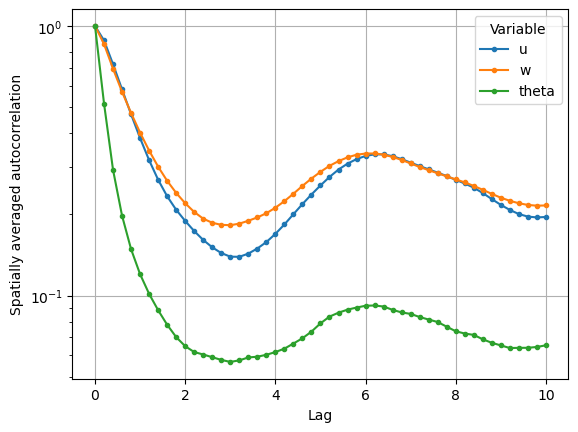

In [14]:
fig, ax = plt.subplots()
for array, label in zip([u_corr, w_corr, theta_corr], ['u', 'w', 'theta']):
    ax.semilogy(array.t_lag, array.mean('x').integrate('z'), label=label, marker='.')

ax.legend(title='Variable')
ax.grid()
ax.set(xlabel='Lag', ylabel='Spatially averaged autocorrelation')

In [47]:
client.close()